In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [7]:
plt.rcParams['font.family'] = 'serif'

df_bn = pd.read_csv('csv/merged_tunedlens_data_bn.csv', encoding='utf-8')
df_mr = pd.read_csv('csv/merged_tunedlens_data_mr.csv', encoding='utf-8')
df_hi = pd.read_csv('csv/merged_tunedlens_data_hi.csv', encoding='utf-8')

# Add language labels
df_bn['language'] = 'Bengali'
df_mr['language'] = 'Marathi'
df_hi['language'] = 'Hindi'

df_combined = pd.concat([df_bn, df_mr, df_hi], ignore_index=True)

# Define colors for each language
colors = {
    'Bengali': '#766CDB',
    'Marathi': '#DB6C76',
    'Hindi': '#6CDB76'
}

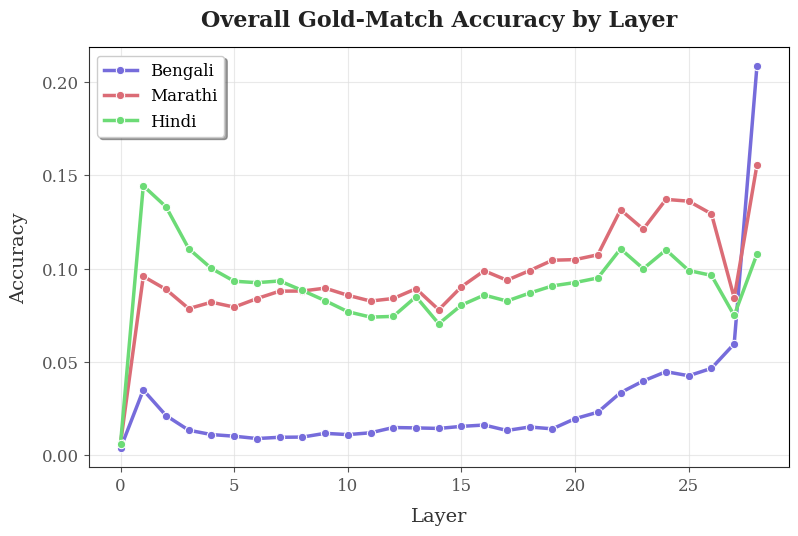

In [8]:
accuracy_layer_combined = df_combined.groupby(['layer', 'language'])['match_gold_answer'].mean().reset_index(name='accuracy')

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

for lang in ['Bengali', 'Marathi', 'Hindi']:
    lang_data = accuracy_layer_combined[accuracy_layer_combined['language'] == lang]
    sns.lineplot(data=lang_data, x='layer', y='accuracy', marker='o', 
                color=colors[lang], label=lang, ax=ax, linewidth=2.5, markersize=6)

ax.set_title('Overall Gold-Match Accuracy by Layer', 
            fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Layer', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Accuracy', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, color='#E0E0E0', alpha=0.7)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)
ax.legend(frameon=True, fancybox=True, shadow=True, fontsize=12, loc='best')
plt.show()


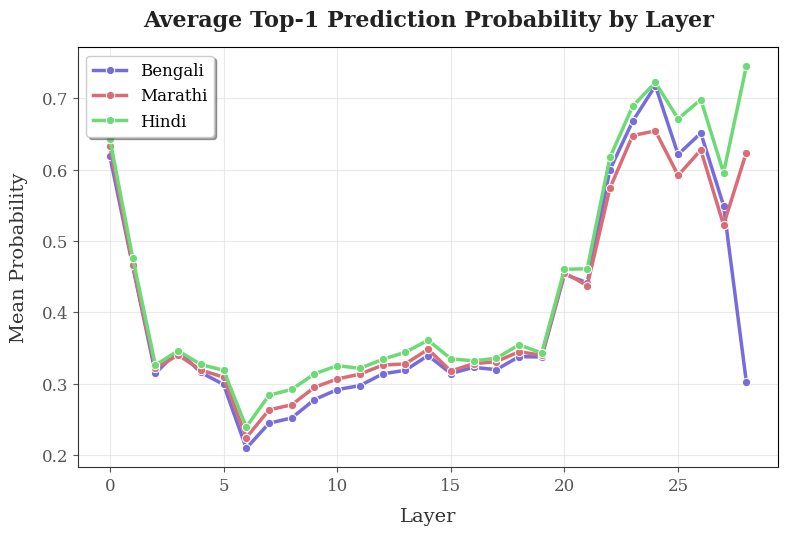

In [9]:
avg_prob_layer_combined = df_combined[df_combined['rank'] == 1].groupby(['layer', 'language'])['probability'].mean().reset_index(name='avg_top1_prob')

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

for lang in ['Bengali', 'Marathi', 'Hindi']:
    lang_data = avg_prob_layer_combined[avg_prob_layer_combined['language'] == lang]
    sns.lineplot(data=lang_data, x='layer', y='avg_top1_prob', marker='o', 
                color=colors[lang], label=lang, ax=ax, linewidth=2.5, markersize=6)

ax.set_title('Average Top-1 Prediction Probability by Layer', 
            fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Layer', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Mean Probability', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, color='#E0E0E0', alpha=0.7)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)
ax.legend(frameon=True, fancybox=True, shadow=True, fontsize=12, loc='best')
plt.show()

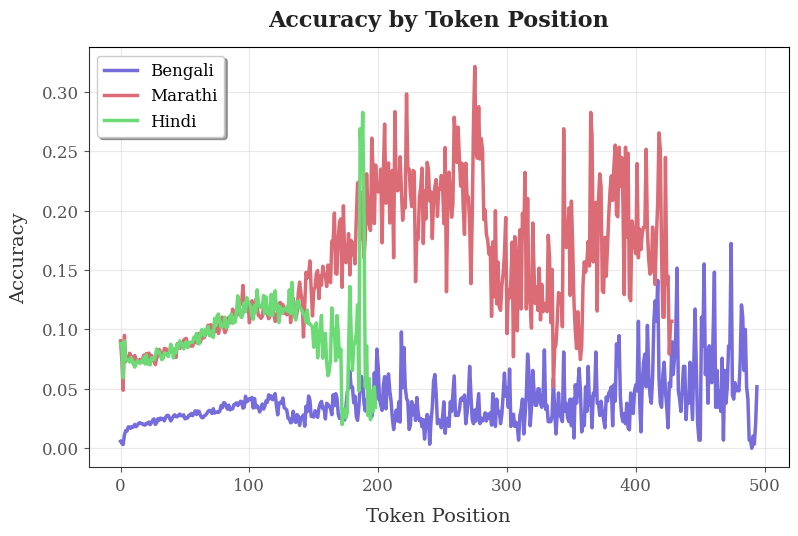

In [10]:
pos_acc_combined = df_combined.groupby(['token_position', 'language'])['match_gold_answer'].mean().reset_index(name='accuracy')

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

for lang in ['Bengali', 'Marathi', 'Hindi']:
    lang_data = pos_acc_combined[pos_acc_combined['language'] == lang]
    sns.lineplot(data=lang_data, x='token_position', y='accuracy', 
                color=colors[lang], label=lang, ax=ax, linewidth=2.5)

ax.set_title('Accuracy by Token Position', 
            fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Token Position', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Accuracy', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, color='#E0E0E0', alpha=0.7)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)
ax.legend(frameon=True, fancybox=True, shadow=True, fontsize=12, loc='best')
plt.show()

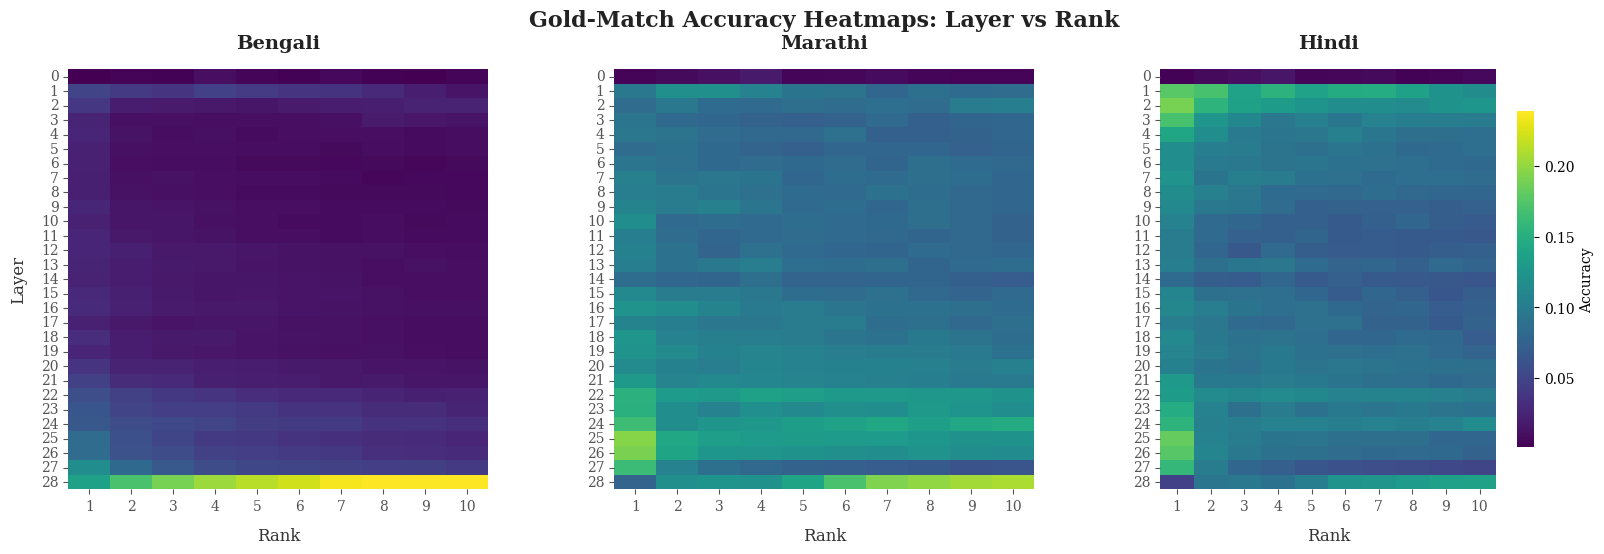

In [13]:
def prepare_heatmap_data(df, lang_name):
    heat_df = df[df['rank'] <= 10].groupby(['layer', 'rank'])['match_gold_answer'].mean().reset_index()
    heat_pivot = heat_df.pivot(index='layer', columns='rank', values='match_gold_answer')
    return heat_pivot

# Create pivot tables for each language
heat_pivot_bn = prepare_heatmap_data(df_bn, 'Bengali')
heat_pivot_mr = prepare_heatmap_data(df_mr, 'Marathi')
heat_pivot_hi = prepare_heatmap_data(df_hi, 'Hindi')

# %%
# Create three side-by-side heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(left=0.08, right=0.92, top=0.85, bottom=0.15, wspace=0.3)

# Define common color scale for consistency
vmin = min(heat_pivot_bn.min().min(), heat_pivot_mr.min().min(), heat_pivot_hi.min().min())
vmax = max(heat_pivot_bn.max().max(), heat_pivot_mr.max().max(), heat_pivot_hi.max().max())

# Heatmap 1: Bengali
sns.heatmap(heat_pivot_bn, cmap='viridis', ax=axes[0], 
            vmin=vmin, vmax=vmax, cbar=False,
            annot=False, fmt='.3f', square=False)
axes[0].set_title('Bengali', fontsize=14, fontweight='semibold', 
                  color='#222222', pad=15)
axes[0].set_xlabel('Rank', fontsize=12, fontweight='medium', color='#333333', labelpad=10)
axes[0].set_ylabel('Layer', fontsize=12, fontweight='medium', color='#333333', labelpad=10)
axes[0].tick_params(axis='both', colors='#555555', labelsize=10)

# Heatmap 2: Marathi
sns.heatmap(heat_pivot_mr, cmap='viridis', ax=axes[1], 
            vmin=vmin, vmax=vmax, cbar=False,
            annot=False, fmt='.3f', square=False)
axes[1].set_title('Marathi', fontsize=14, fontweight='semibold', 
                  color='#222222', pad=15)
axes[1].set_xlabel('Rank', fontsize=12, fontweight='medium', color='#333333', labelpad=10)
axes[1].set_ylabel('', fontsize=12, fontweight='medium', color='#333333', labelpad=10)
axes[1].tick_params(axis='both', colors='#555555', labelsize=10)

# Heatmap 3: Hindi
im = sns.heatmap(heat_pivot_hi, cmap='viridis', ax=axes[2], 
                 vmin=vmin, vmax=vmax, cbar=True,
                 cbar_kws={'label': 'Accuracy', 'shrink': 0.8},
                 annot=False, fmt='.3f', square=False)
axes[2].set_title('Hindi', fontsize=14, fontweight='semibold', 
                  color='#222222', pad=15)
axes[2].set_xlabel('Rank', fontsize=12, fontweight='medium', color='#333333', labelpad=10)
axes[2].set_ylabel('', fontsize=12, fontweight='medium', color='#333333', labelpad=10)
axes[2].tick_params(axis='both', colors='#555555', labelsize=10)

# Add main title
fig.suptitle('Gold-Match Accuracy Heatmaps: Layer vs Rank', 
             fontsize=16, fontweight='bold', y=0.95, color='#222222')

plt.show()